In [10]:
import FalseColor.Color as fc
from FalseColor.FCdataobject import DataObject
import numpy as np
import tifffile as tif
import os
%matplotlib notebook
import matplotlib.pyplot as plt
import h5py as h5
import scipy.ndimage as nd
import skimage as sk
import cv2
from copy import deepcopy

In [11]:
#method for viewing plots
def ViewImage(Images,title=None,do_hist = False,
              figsize = (6,4), range_min=0,
              range_max=None,cmap='viridis'):
    if do_hist:
        f,ax = plt.subplots(ncols = 2,figsize = figsize)
        ax[0].imshow(Images)
        ax[0].set_title('Image')
        if range_max is None:
            range_max = Images.max()
        ax[1].hist(Images[Images != 0].ravel(),256,[range_min,range_max])
        ax[1].set_title('Histogram')
        if title is not None:
            f.suptitle(title)
    else:
        f,ax = plt.subplots(figsize=figsize)
        ax.imshow(Images,cmap=cmap)
        if title is not None:
            ax.set_title(title)
    return f,ax

#runnable wrapper for fc.falseColor
def false_color_runnable(imageSet):
    nuclei = imageSet[:,:,0]
    cyto = imageSet[:,:,1]
    return fc.falseColor(nuclei,cyto)



In [12]:
#create runnable for CPU processing
runnable_dict = {'runnable':false_color_runnable,'kwargs': None}

In [52]:
#load data
file_path = os.path.join(os.getcwd(),'h5_sample_data')
data_file = os.path.join(file_path,'example_data.h5')

#setup DataObject with hdf5 imageSet
Dataset = DataObject(file_path)
Dataset.setupH5data()

['t00000']
(20, 1025, 1025, 2)


<IPython.core.display.Javascript object>


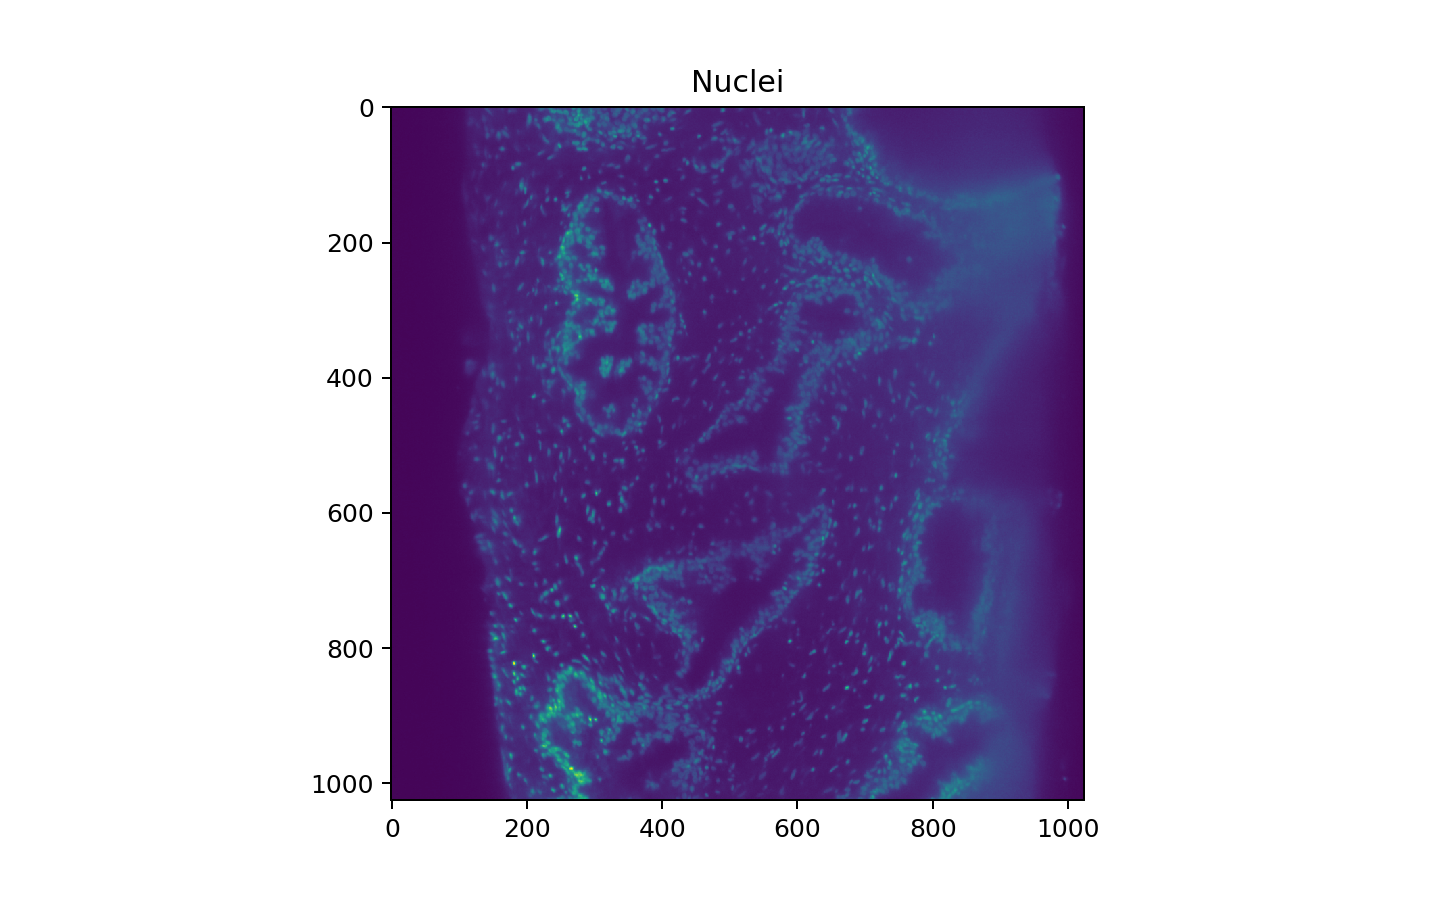

<IPython.core.display.Javascript object>


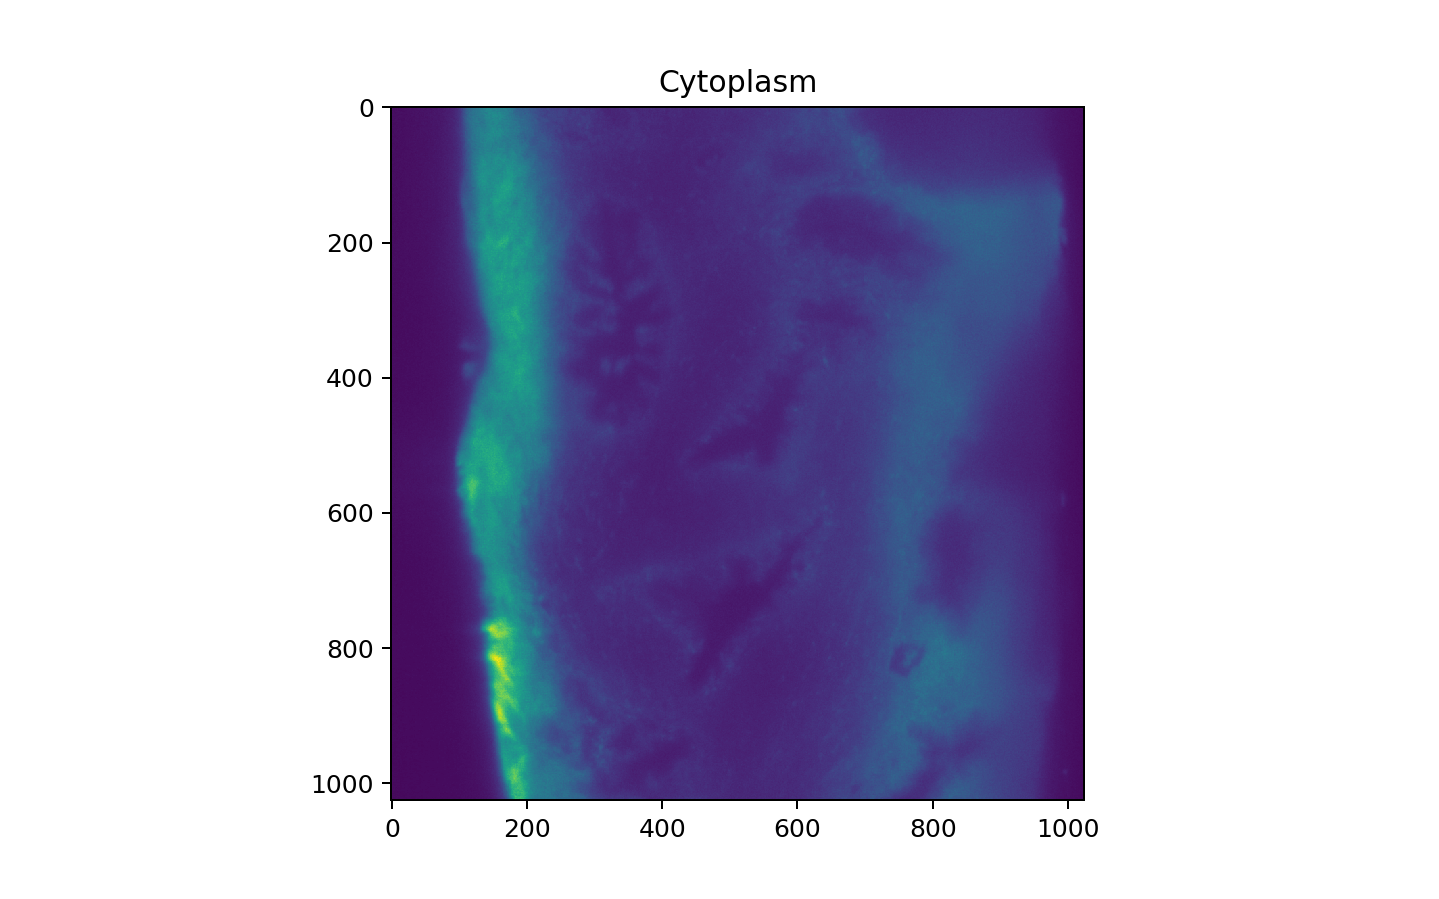

(<Figure size 800x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c3e9f7278>)

In [53]:
#View Example data
ViewImage(Dataset.imageSet[10,:,:,0], title = 'Nuclei',figsize = (8,5))
ViewImage(Dataset.imageSet[10,:,:,1], title = 'Cytoplasm',figsize = (8,5))

In [54]:
#run parallel processing on multiple CPU cores
pseudo_colored_data = Dataset.processImages(runnable_dict,Dataset.imageSet)

<function false_color_runnable at 0x1c29f03e18> None (20, 1025, 1025, 2)


<IPython.core.display.Javascript object>


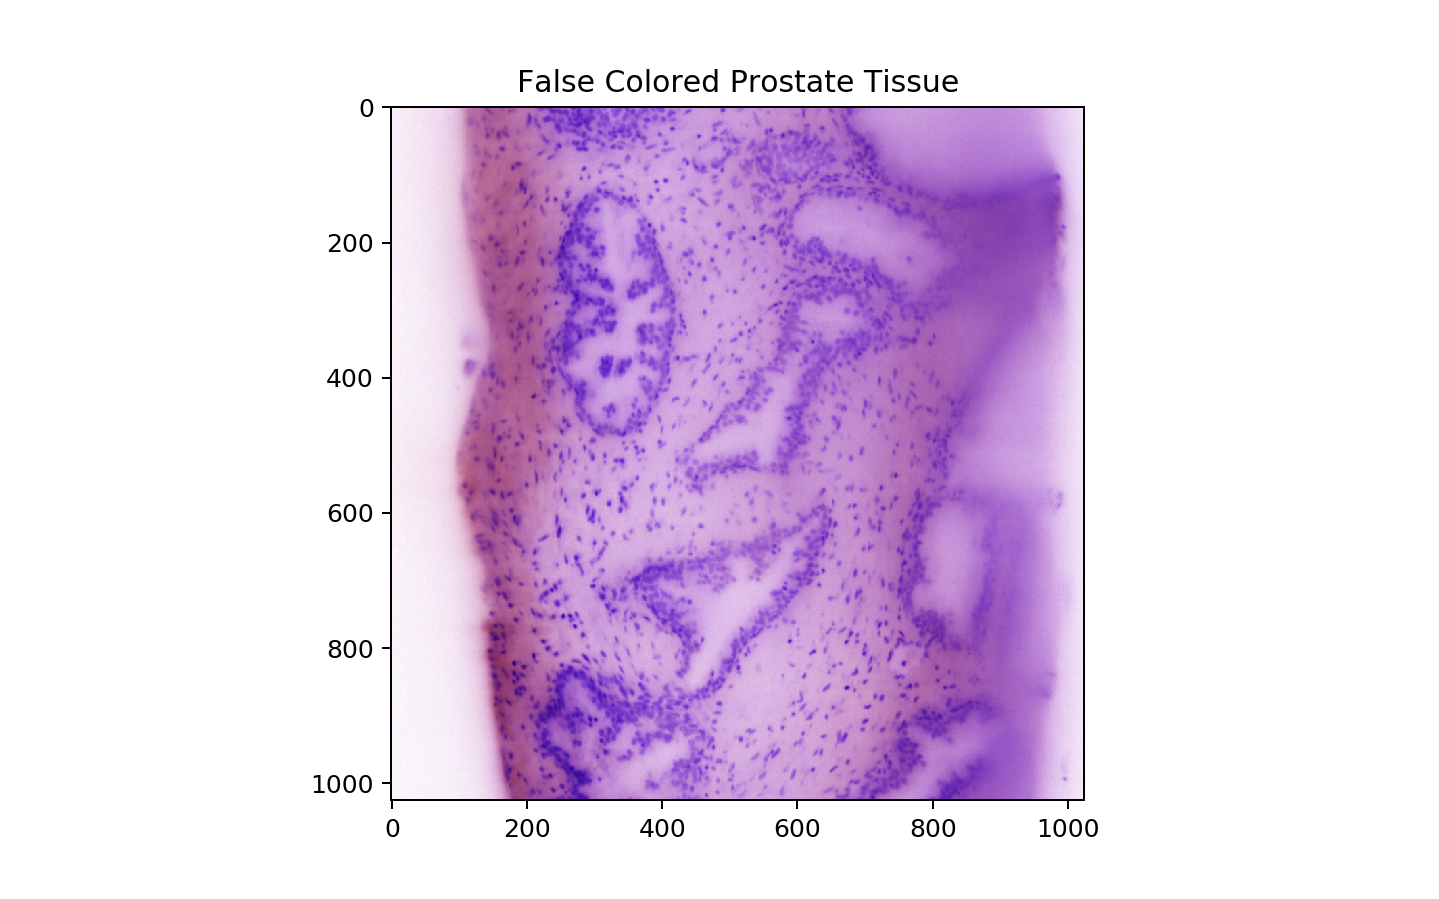

(<Figure size 800x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c3ad338d0>)

In [55]:
#View results
ViewImage(pseudo_colored_data[0][10],title='False Colored Prostate Tissue', figsize=(8,5))